In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

In [4]:
df = pd.read_table("SouthCalifornia-1982-2011.dat",sep=" ")
col= ['index','p_index', 'time', 'magnitude','latitude' ,'longitude','depth']
df.columns= col
df

,index,p_index,time,magnitude,latitude,longitude,depth
0,1,0,3.650139e+04,2.12,-2363740,-4787011,3461373
1,2,0,3.748828e+04,2.33,-2363746,-4786942,3461232
2,3,0,4.798252e+04,2.57,-2475085,-4664024,3548479
3,4,0,6.026857e+04,2.98,-2238642,-4839098,3469546
4,5,0,1.006128e+05,2.04,-2545592,-4588519,3597315
...,...,...,...,...,...,...,...
110265,110266,-1,9.304996e+08,2.60,-2668492,-4335735,3810743
110266,110267,-1,9.305115e+08,2.02,-2297480,-4823870,3445285
110267,110268,-1,9.305318e+08,2.00,-2404797,-4441247,3868121
110268,110269,-1,9.305363e+08,2.17,-2388375,-4691191,3550903


In [5]:
# Just to make sure to sort the data according to time
df = df.sort_values(by=['time'])


In [6]:
# setting the values of magnitude

mag = 2.50

df_mag = df[df['magnitude']>=mag]

# df_mag.shape

print("There are total",df_mag.shape[0],"Earthquake Having Magnitue >= ",mag)

There are total 39179 Earthquake Having Magnitue >=  2.5


In [7]:
# Computing the distance

df_mag1 = df_mag.copy()

df_mag1['distance'] = np.sqrt((df_mag['longitude'].diff(periods=-1))**2 + (df_mag['latitude'].diff(periods=-1))**2 + (df_mag['depth'].diff(periods=-1))**2)
# df_mag
df_mag1.dropna() # the last row is empty so the NULL values


,index,p_index,time,magnitude,latitude,longitude,depth,distance
2,3,0,4.798252e+04,2.57,-2475085,-4664024,3548479,304608.956227
3,4,0,6.026857e+04,2.98,-2238642,-4839098,3469546,427642.769023
6,7,0,1.275294e+05,2.64,-2484433,-4558759,3679010,59631.470031
7,8,0,1.303646e+05,2.62,-2429713,-4582352,3681247,429208.942882
11,12,0,2.425680e+05,2.66,-2372004,-4855764,3355462,326515.945039
...,...,...,...,...,...,...,...,...
110252,110253,-1,9.302818e+08,2.70,-2316226,-4689520,3619881,198823.225799
110257,110258,-1,9.303677e+08,2.57,-2300293,-4809968,3462499,687366.907554
110260,110261,-1,9.304017e+08,2.50,-2656549,-4334839,3808631,143269.660434
110261,110262,-1,9.304458e+08,2.60,-2657612,-4436323,3707507,144547.541799


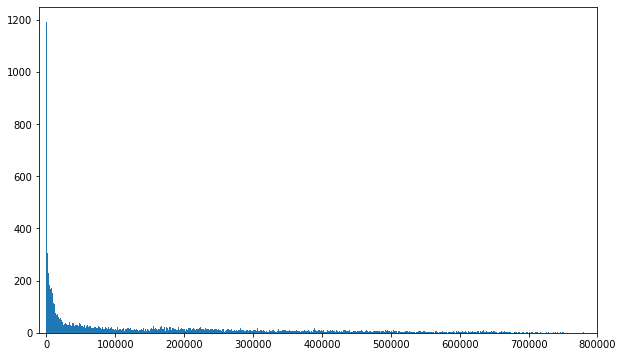

In [10]:
# Ploting the data on histogram
bin=3500

fig , ax = plt.subplots(figsize=(10,6))

ax.hist(df_mag1['distance'], bins=bin)
# plt.axis([-10000, 800000, 0, 600])
ax.set_xlim(-10000,800000)

plt.show()



The result for trying different values of Magnitude, we obtained the following result
There are total 11923 Earthquake Having Magnitue >=  3


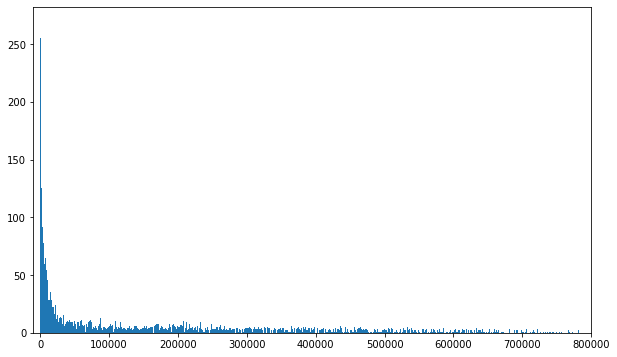

There are total 3638 Earthquake Having Magnitue >=  3.5


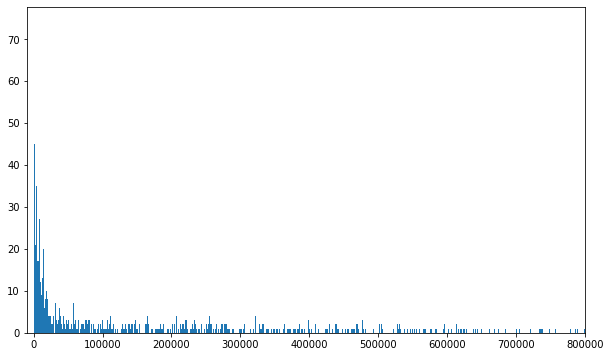

There are total 1133 Earthquake Having Magnitue >=  4


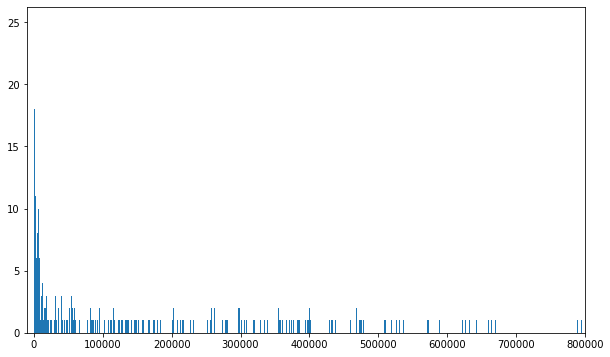

There are total 109 Earthquake Having Magnitue >=  5


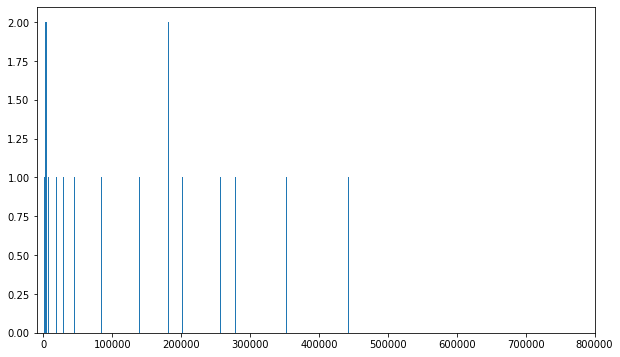

There are total 13 Earthquake Having Magnitue >=  6


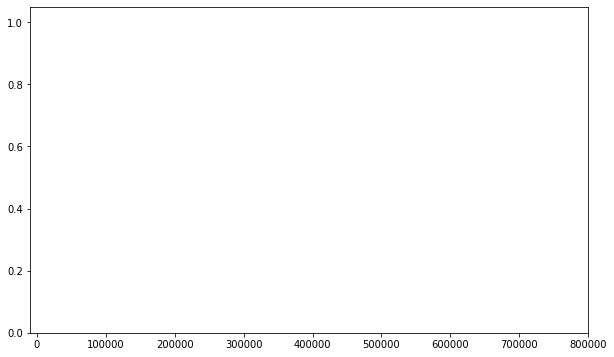

In [11]:
# trying different values of Magnitude ( m )
print("The result for trying different values of Magnitude, we obtained the following result")
m = [3, 3.5 , 4, 5, 6]
for i in range (len(m)):
    df_mag = df[df['magnitude']>=m[i]]
    print("There are total",df_mag.shape[0],"Earthquake Having Magnitue >= ",m[i])
    
    
    df_mag1 = df_mag.copy()
    df_mag1['distance'] = np.sqrt((df_mag['longitude'].diff(periods=-1))**2 + (df_mag['latitude'].diff(periods=-1))**2 + (df_mag['depth'].diff(periods=-1))**2)
    df_mag1.dropna()
    
    
    fig , ax = plt.subplots(figsize=(10,6))
    ax.hist(df_mag1['distance'], bins=bin)
    # plt.axis([-10000, 800000, 0, 600])
    ax.set_xlim(-10000,800000)
    plt.show()

    


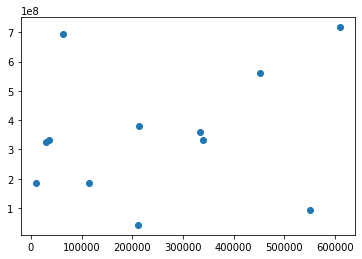

In [14]:
#fitting line 
plt.scatter(df_mag1['distance'], df_mag1['time']  )

In [ ]:
# references to find the distance for hypocenter 
# https://gfzpublic.gfz-potsdam.de/rest/items/item_43361/component/file_816919/content
# https://statisticsbyjim.com/hypothesis-testing/identify-distribution-data/
